In [2]:
!pip install pandas-datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import concat
import matplotlib
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as web
import datetime as dt

In [10]:
BAR = pd.read_csv('Barclays.csv')
NOM = pd.read_csv('Nomura.csv')
CITI = pd.read_csv('Citi.csv')
GS = pd.read_csv('Goldman.csv')

In [7]:
NOM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-02-26,5.97,5.97,5.85,5.88,5.88,161800
248,2021-03-01,5.97,5.99,5.94,5.98,5.98,121600
249,2021-03-02,5.96,5.97,5.92,5.95,5.95,87800
250,2021-03-03,5.98,6.08,5.98,6.05,6.05,330000
251,2021-03-04,6.07,6.08,5.92,6.01,6.01,456200


In [8]:
BAR.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-02-26,159.139999,164.720001,157.759995,159.600006,159.600006,81184844
249,2021-03-01,162.000000,164.279999,160.279999,161.339996,161.339996,47114977
250,2021-03-02,160.679993,164.039993,159.740005,162.220001,162.220001,31296043
251,2021-03-03,163.779999,170.339996,111.827003,170.339996,170.339996,86451554
252,2021-03-04,170.940002,171.179993,165.619995,166.660004,166.660004,42583702


In [11]:
CITI.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-02-26,66.779999,67.599998,65.540001,65.879997,65.879997,24170600
248,2021-03-01,68.489998,69.989998,67.980003,69.540001,69.540001,28037900
249,2021-03-02,69.190002,69.989998,68.849998,68.910004,68.910004,19188800
250,2021-03-03,69.489998,71.489998,69.300003,70.379997,70.379997,25147200
251,2021-03-04,70.180000,71.779999,67.889999,69.809998,69.809998,28400700


In [12]:
GS.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-02-26,325.769989,328.679993,319.040009,319.480011,318.230011,3731100
248,2021-03-01,325.000000,331.040009,323.309998,329.920013,329.920013,2957800
249,2021-03-02,330.000000,336.190002,329.510010,330.940002,330.940002,2849700
250,2021-03-03,333.679993,340.100006,333.250000,334.429993,334.429993,3604200
251,2021-03-04,333.130005,339.760010,323.920013,329.290009,329.290009,3642900


We can see that GS has the highest stock prices as of March 2021 and Nomura Holdings has the worst performing stock out of the 4

In [16]:
BAR['date'] = pd.to_datetime(BAR['Date'])
NOM['date'] = pd.to_datetime(NOM['Date'])
CITI['date'] = pd.to_datetime(CITI['Date'])
GS['date'] = pd.to_datetime(GS['Date'])

In [17]:
BAR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,118.805968,121.779198,116.104597,118.933280,118.234231,6.099791e+07
std,21.240634,21.467890,21.101558,21.473914,21.393494,3.651910e+07
min,80.000000,83.309998,73.040001,80.239998,79.752449,1.472958e+07
25%,103.040001,105.360001,100.820000,103.400002,102.771736,3.597312e+07
50%,112.500000,115.796997,111.000000,112.620003,111.935715,4.956677e+07
75%,139.000000,142.179993,135.820007,139.500000,138.652390,7.661933e+07
max,170.940002,171.179993,165.619995,170.339996,170.339996,2.343748e+08


In [18]:
NOM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,4.799802,4.838492,4.756984,4.800079,4.800079,2.689714e+05
std,0.604729,0.602566,0.614276,0.614536,0.614536,2.326917e+05
min,3.550000,3.770000,3.550000,3.600000,3.600000,4.100000e+04
25%,4.417500,4.440000,4.360000,4.410000,4.410000,1.153500e+05
50%,4.710000,4.750000,4.685000,4.725000,4.725000,1.936000e+05
75%,5.160000,5.190000,5.132500,5.170000,5.170000,3.351250e+05
max,6.230000,6.310000,6.190000,6.250000,6.250000,2.144100e+06


In [19]:
CITI.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,51.657143,52.519365,50.640675,51.548770,50.517531,2.606271e+07
std,7.950264,7.866564,8.015375,7.974822,8.299767,9.668117e+06
min,35.470001,37.990002,32.000000,35.389999,33.953419,6.824400e+06
25%,44.800001,45.590000,43.639998,44.425000,43.252398,1.962028e+07
50%,51.100001,51.830000,50.140001,50.975001,49.766627,2.471820e+07
75%,58.277501,58.900000,57.370001,58.377501,57.734648,2.993375e+07
max,70.180000,71.779999,69.300003,70.379997,70.379997,8.468970e+07


In [20]:
GS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,217.032778,220.416310,214.010119,217.319722,214.898772,3.588113e+06
std,43.494638,43.642542,43.764695,43.861712,44.676877,1.628709e+06
min,136.029999,141.940002,130.850006,134.970001,132.082764,9.681000e+05
25%,192.457501,196.260002,188.870002,193.867500,191.002285,2.479675e+06
50%,205.050003,207.404998,202.125000,204.954994,202.636818,3.176900e+06
75%,235.500000,238.122498,232.769993,236.779995,234.733589,4.156225e+06
max,333.679993,340.100006,333.250000,334.429993,334.429993,1.251670e+07


In [21]:
ib_list = ['BAR', 'NOM', 'CITI', 'GS']
ib_bank_list = [BAR, NOM, CITI, GS]
bank_name = ['Barclays', 'Nomura Holdings', 'Citi Group', 'Goldman Sachs']
for i, bank in enumerate(ib_bank_list, 1):
    bank['Name'] = bank_name[i-1]

Conducting EDA now

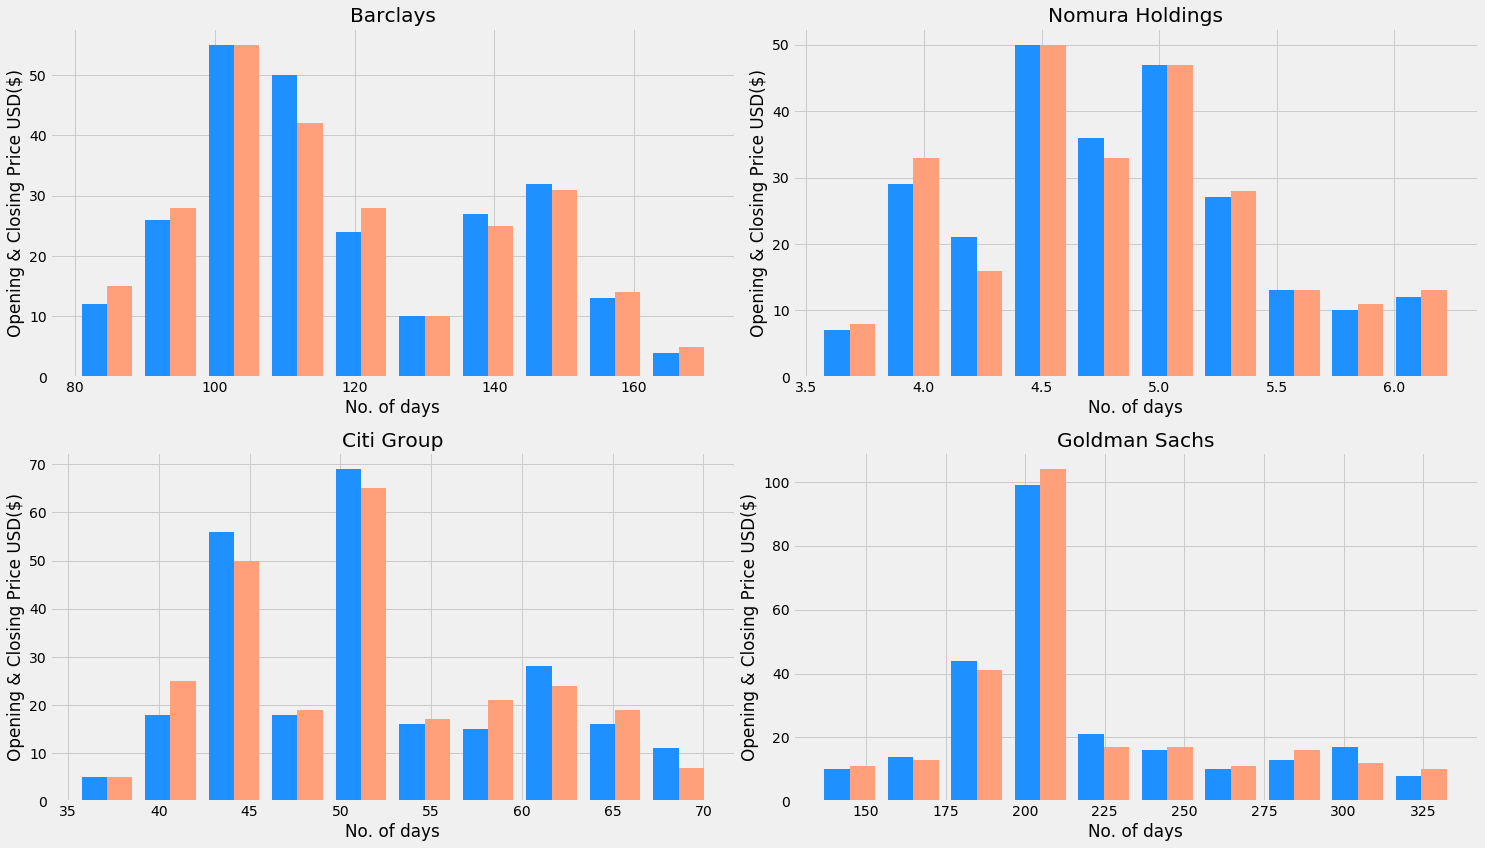

In [30]:
#Relationship between opening and closing price
plt.figure(figsize = (21, 12))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    plt.tight_layout()
    plt.hist([bank['Open'], bank['Close']], color = ["dodgerblue", "lightsalmon"])
    plt.ylabel("Opening & Closing Price USD($)")
    plt.xlabel("No. of days")
    plt.title(f"{bank_name[i - 1]}")
#Opening in blue, closing in salmon
# GS leads, Citi follows and Nomura again does the worst

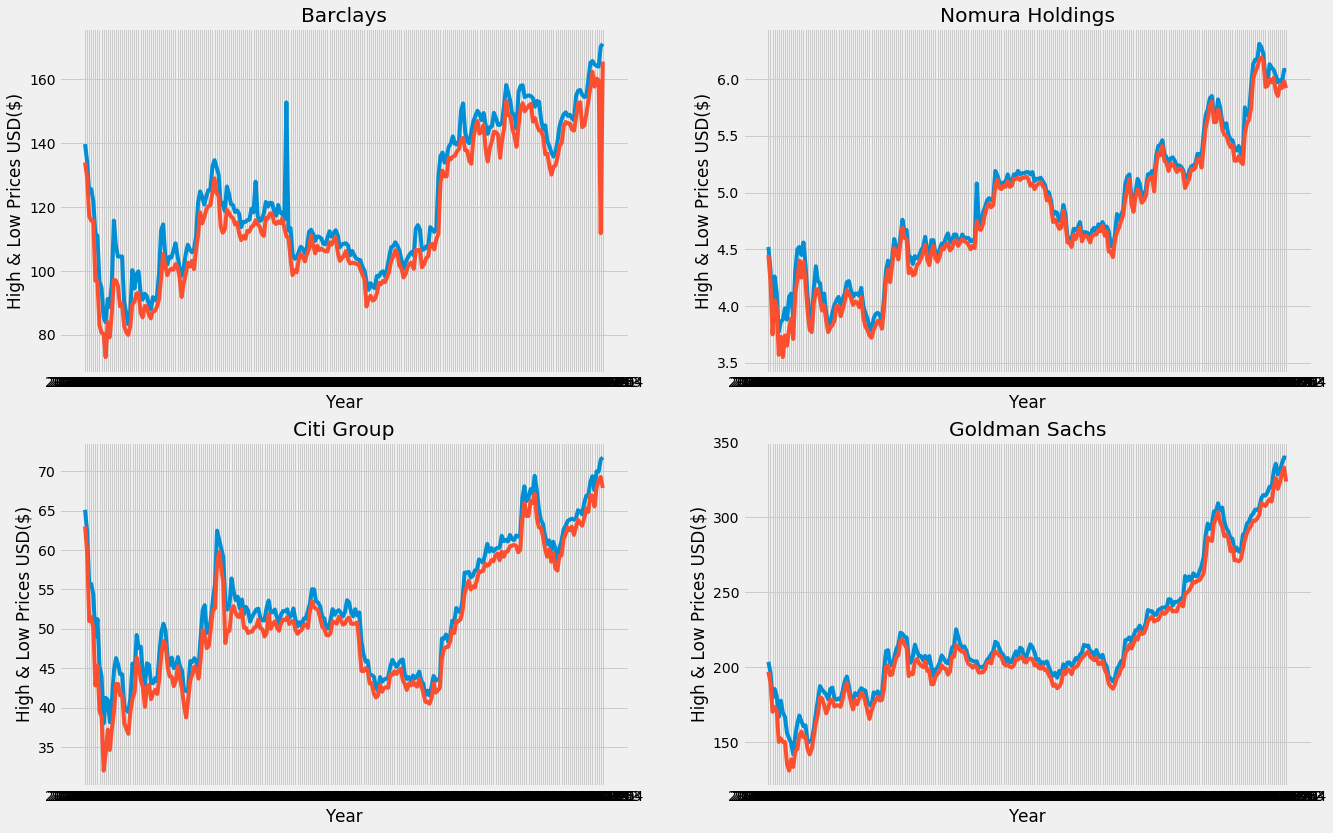

In [32]:
#correlation between high and low prices
plt.figure(figsize = (20, 13))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(bank['Date'], bank[['High','Low']])
    plt.xlabel("Year")
    plt.ylabel("High & Low Prices USD($)")
    plt.title(f"{bank_name[i - 1]}")
    #Not much fluctuation in HL prices for Nomura, followed by GS, MOST DISSONANCE IN BARCLAYS and Citi

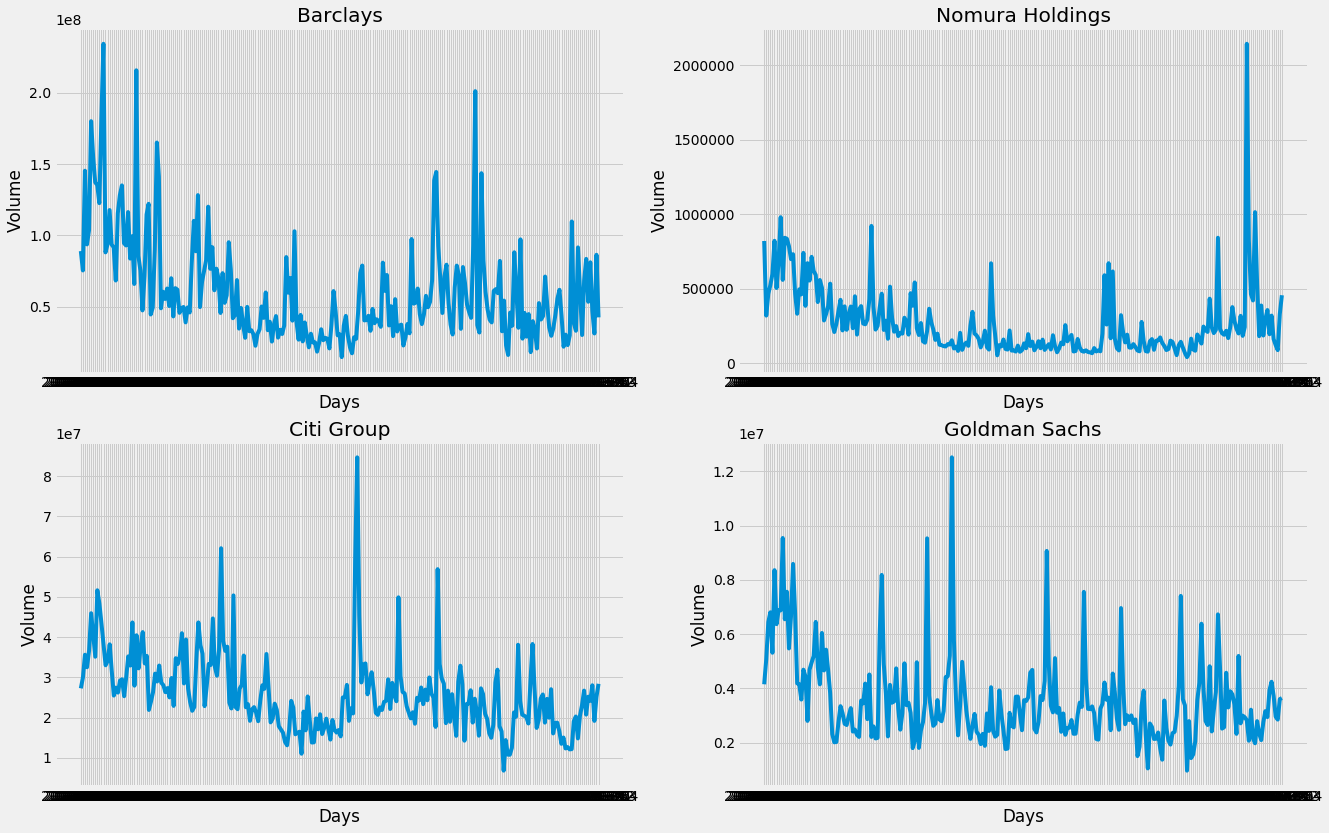

In [36]:
#daily volume
plt.figure(figsize = (20, 13))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(bank['Date'], bank[['Volume']])
    plt.ylabel("Volume")
    plt.xlabel("Days")
    plt.title(f"{bank_name[i - 1]}")

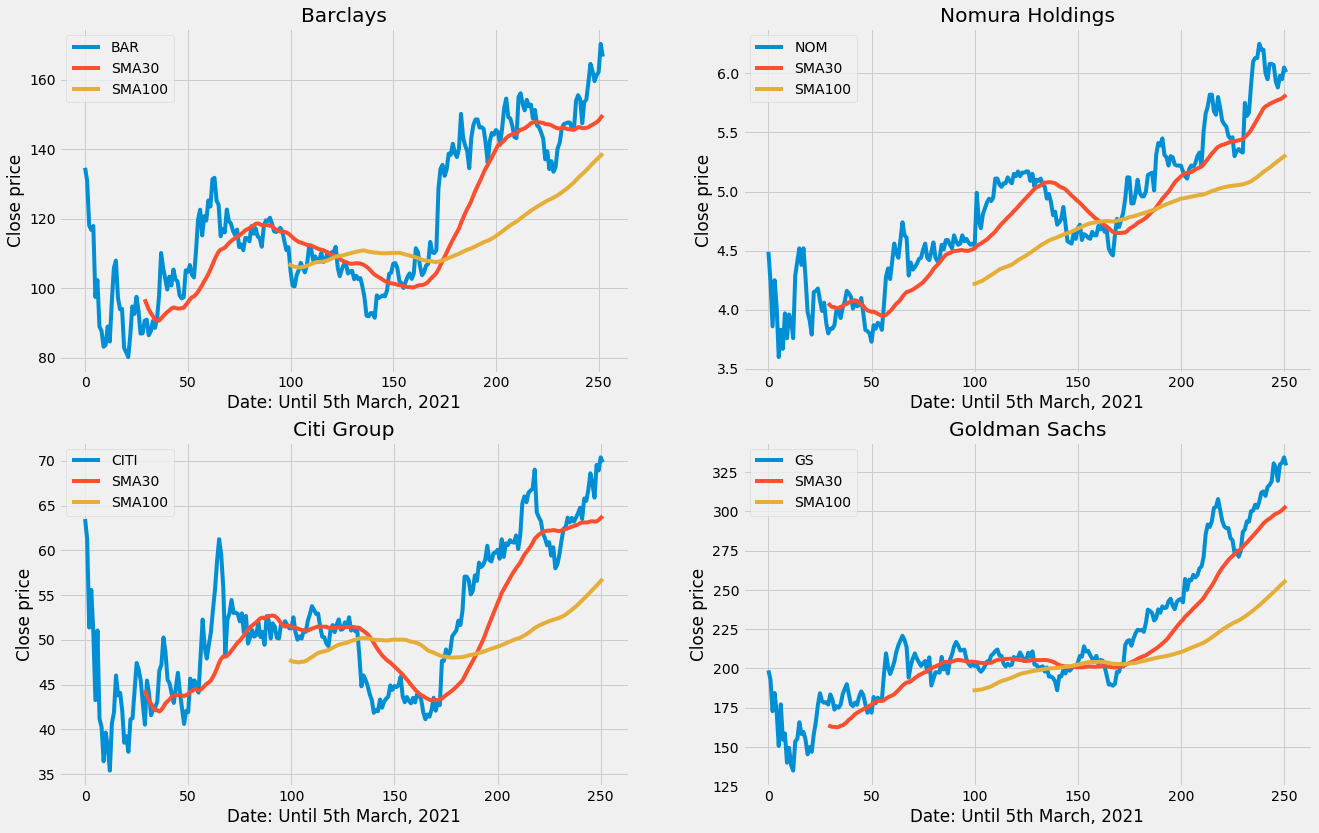

In [37]:
plt.figure(figsize = (20, 13))
sma30 = []
sma100 = []
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    avg30day = pd.DataFrame()
    avg30day['Close'] = bank['Close'].rolling(window = 30).mean()
    sma30.append(avg30day)
    avg100day = pd.DataFrame()
    avg100day['Close'] = bank['Close'].rolling(window = 100).mean()
    sma100.append(avg100day)
    plt.plot(bank['Close'], label = f"{ib_list[i - 1]}")
    plt.plot(avg30day['Close'], label = 'SMA30')
    plt.plot(avg100day['Close'], label = 'SMA100')
    plt.title(f"{bank_name[i - 1]}")
    plt.xlabel("Date: Until 5th March, 2021")
    plt.ylabel("Close price")
    plt.legend(loc = "upper left")

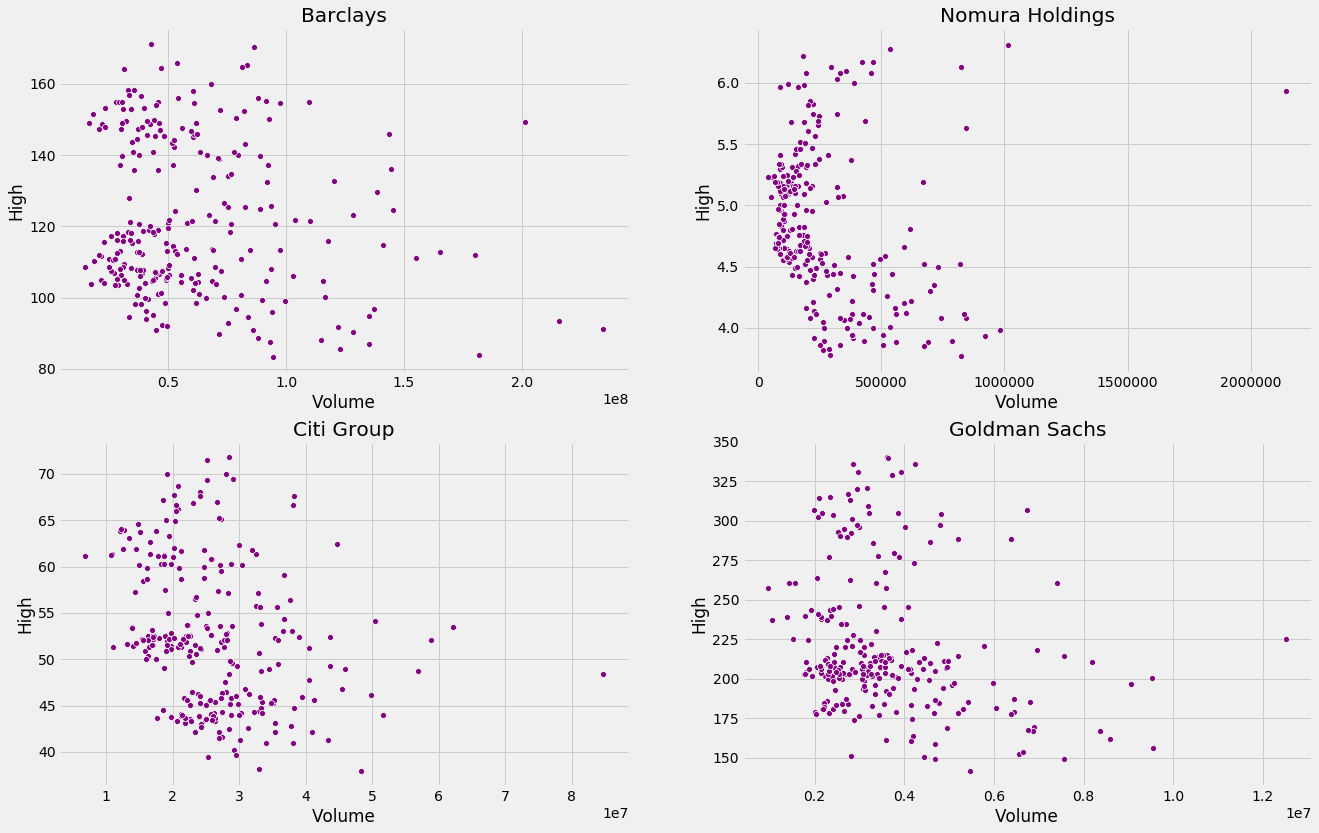

In [39]:
#Correlation between high price and volume
matplotlib.pyplot.figure(figsize = (20, 13))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x = bank['Volume'], y = bank['High'], color = 'purple')
    plt.title(f"{bank_name[i - 1]}") 
#Lower the volume, higher the price

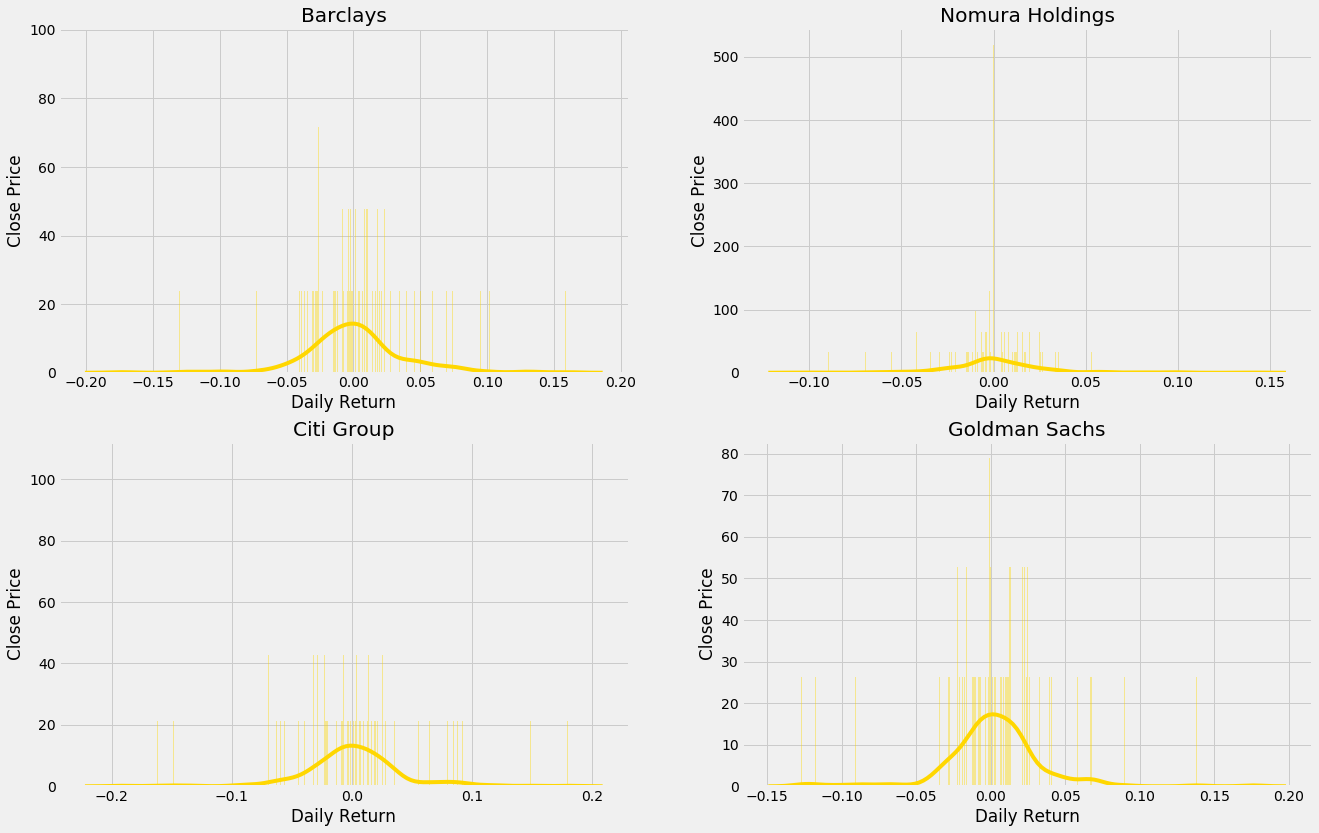

In [40]:
#daily return 
plt.figure(figsize = (20, 13))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)
    bank['Daily Return'] = bank['Close'].pct_change()
    sns.distplot(bank['Daily Return'].dropna(),bins = 2000, color = "gold")
    plt.ylabel('Close Price')
    plt.title(f"{bank_name[i - 1]}")
#plt.ioff()
#Barclays and GS have highest daily returns

Buy and sell model, function that checks where 30day and 100 day average meet at a point

In [41]:
for i, bank in enumerate(ib_bank_list, 1):
    bank['avg30day'] = sma30[i-1]
    bank['avg100day'] = sma100[i-1]
    i += 1


In [44]:
def stock_interpretation(comp):
    buy, sell, c = [], [], -1
    for i in range(len(comp)):
        if(comp['avg30day'][i] > comp['avg100day'][i]): #i is the position of the graph
            if c != 1:
                buy.append(comp['Close'][i])
                sell.append(np.nan)
                c = 1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        elif(comp['avg30day'][i] < comp['avg100day'][i]):
            if c!= 0:
                buy.append(np.nan)
                sell.append(comp['Close'][i])
                c = 0
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy, sell)

In [45]:
#running operation on stocks
o1 = stock_interpretation(BAR)
BAR['buy'] = o1[0]
BAR['sell'] = o1[1]
o2 = stock_interpretation(NOM)
NOM['buy'] = o2[0]
NOM['sell'] = o2[1]
o3 = stock_interpretation(CITI)
CITI['buy'] = o3[0]
CITI['sell'] = o3[1]
o4 = stock_interpretation(GS)
GS['buy'] = o4[0]
GS['sell'] = o4[1]

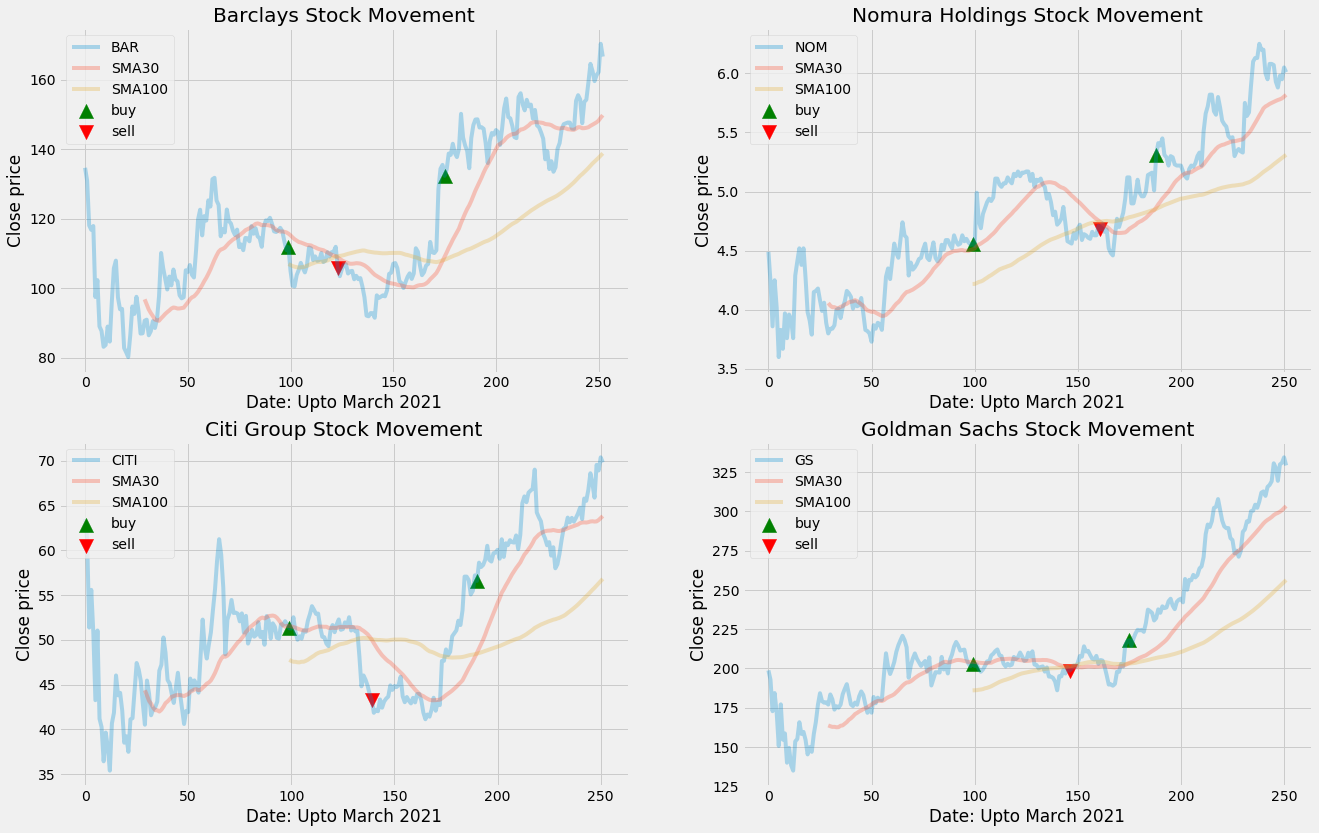

In [49]:
#stock movement
plt.figure(figsize = (20, 13))
for i, bank in enumerate(ib_bank_list, 1):
    plt.subplot(2, 2, i)   
    plt.plot(bank['Close'], label = f"{ib_list[i - 1]}", alpha = 0.3)
    plt.plot(bank['avg30day'], label = 'SMA30', alpha = 0.3)
    plt.plot(bank['avg100day'], label = 'SMA100', alpha = 0.3)
    plt.scatter(bank.index, bank['buy'], label = 'buy', marker = "^", color = "green", s = 200)
    plt.scatter(bank.index, bank['sell'], label = 'sell', marker = "v", color = "red", s = 200)
    plt.title(f"{bank_name[i - 1]} Stock Movement")
    plt.legend(loc = "upper left")
    plt.xlabel("Date: Upto March 2021")
    plt.ylabel("Close price")